In [29]:
using DelimitedFiles
using CairoMakie
using GLMakie
using LinearAlgebra
using Random

In [30]:
copy_size = 20

nx::Int64 = copy_size
ny::Int64 = copy_size
nz::Int64 = copy_size 

include("./introduction.jl")
include("./ir_spectra.jl")


ir_spectra (generic function with 1 method)

In [31]:
ν0 = 2050.0
νk::Vector{Float64} = collect(ν0- range :step:ν0 + range)
nmols_ml = 4*nx*ny*nz
Random.seed!(1234)
num = sign.(rand(nmols_ml) .- 0.5)
random_eu = num .* eu
@time ipda, isda, ip, is = ir_spectra(νk, random_eu,  com_ol, Δν) 

OutOfMemoryError: OutOfMemoryError()

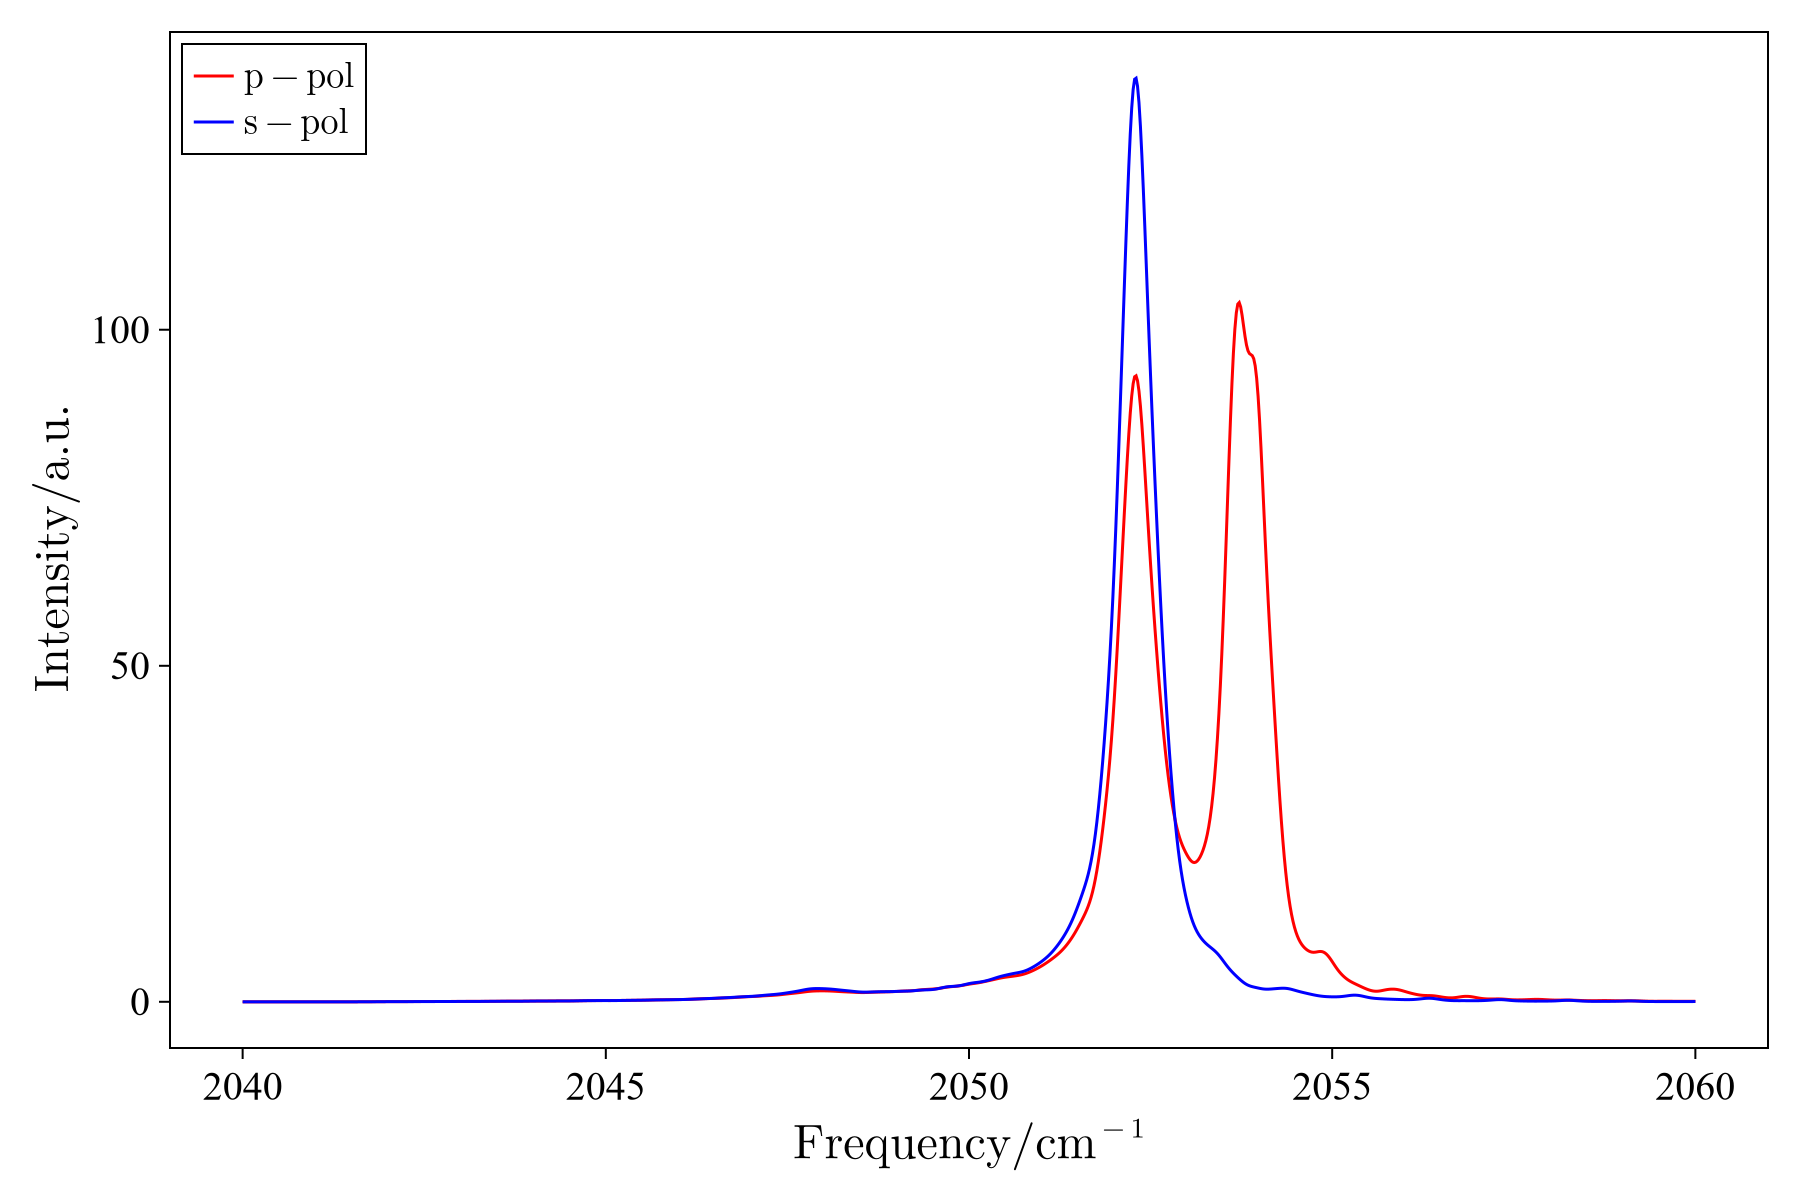

CairoMakie.Screen{IMAGE}


In [32]:
CairoMakie.activate!()
# GLMakie.activate!()
fig = Figure(size=(900, 600))

ax = Axis(fig[1,1], xlabel = L"Frequency/cm$^{-1}$", ylabel = L"Intensity/a.u. $ $", xgridvisible = false, ygridvisible = false)
ax.xlabelsize, ax.ylabelsize  = 24, 24
ax.xticklabelfont, ax.yticklabelfont = "Times New Roman", "Times New Roman"
ax.xticklabelsize, ax.yticklabelsize = 20, 20

α = 0*degrees
ipda_α = (cos(α))^2 .* ipda + (sin(α))^2 .* isda 
isda_α = (cos(α))^2 .* isda + (sin(α))^2 .* ipda 

lines!(ax, νk, ipda, color=:red, label = L"p-pol$ $")
lines!(ax, νk, isda, color=:blue, label = L"s-pol$ $")

axislegend(ax, labelsize = 18, position=:lt)
DataInspector(fig)
display(fig)

In [33]:
GLMakie.activate!()

fig = Figure()
ax = LScene(fig[1,1], show_axis = false)

meshscatter!(ax, com0_ol[:,1], com0_ol[:,2], com0_ol[:,3])

display(fig)


UndefVarError: UndefVarError: `com0_ol` not defined

In [34]:
rand()

0.5715863775229529